In [5]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [6]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [8]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

# Imports the methods needed to abstract classes into tables
from sqlalchemy.ext.declarative import declarative_base

In [9]:
# # create engine to hawaii.sqlite
# engine = create_engine("sqlite:///hawaii.sqlite")

engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

# Print all of the classes mapped to the Base
Base.classes.keys()


['measurement', 'station']

#### Inspector

In [10]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Collect the names of tables within the database
inspector.get_table_names()

['measurement', 'station']

In [11]:
# Using the inspector to print the column names within the 'dow' table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# Using the inspector to print the column names within the 'dow' table and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
# Assign the ['measurement', 'station'] class to a variable called `Dow`
Measurement = Base.classes.measurement
Station = Base.classes.station

#### Session

In [14]:
# Create a session
session = Session(engine)

In [15]:
# Display the row's columns and data in dictionary format
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7faa03ba6910>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'prcp': 0.08,
 'id': 1,
 'station': 'USC00519397'}

In [16]:
# Use the session to query Dow table and display the first 5 trade volumes
for row in session.query(Measurement.id, Measurement.prcp, Measurement.station, Measurement.tobs,Measurement.date).limit(15).all():
    print(row)

(1, 0.08, 'USC00519397', 65.0, '2010-01-01')
(2, 0.0, 'USC00519397', 63.0, '2010-01-02')
(3, 0.0, 'USC00519397', 74.0, '2010-01-03')
(4, 0.0, 'USC00519397', 76.0, '2010-01-04')
(5, None, 'USC00519397', 73.0, '2010-01-06')
(6, 0.06, 'USC00519397', 70.0, '2010-01-07')
(7, 0.0, 'USC00519397', 64.0, '2010-01-08')
(8, 0.0, 'USC00519397', 68.0, '2010-01-09')
(9, 0.0, 'USC00519397', 73.0, '2010-01-10')
(10, 0.01, 'USC00519397', 64.0, '2010-01-11')
(11, 0.0, 'USC00519397', 61.0, '2010-01-12')
(12, 0.0, 'USC00519397', 66.0, '2010-01-14')
(13, 0.0, 'USC00519397', 65.0, '2010-01-15')
(14, 0.0, 'USC00519397', 68.0, '2010-01-16')
(15, 0.0, 'USC00519397', 64.0, '2010-01-17')


In [17]:
# Display the row's columns and data in dictionary format
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7faa0679fac0>,
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168}

In [18]:
# Use the session to query Dow table and display the first 5 trade volumes
for row in session.query(Station.longitude, Station.name, Station.id, Station.elevation,Station.latitude, Station.station).limit(15).all():
    print(row)

(-157.8168, 'WAIKIKI 717.2, HI US', 1, 3.0, 21.2716, 'USC00519397')
(-157.8015, 'KANEOHE 838.1, HI US', 2, 14.6, 21.4234, 'USC00513117')
(-157.8374, 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 3, 7.0, 21.5213, 'USC00514830')
(-157.9751, 'PEARL CITY, HI US', 4, 11.9, 21.3934, 'USC00517948')
(-158.0111, 'UPPER WAHIAWA 874.3, HI US', 5, 306.6, 21.4992, 'USC00518838')
(-157.71139, 'WAIMANALO EXPERIMENTAL FARM, HI US', 6, 19.5, 21.33556, 'USC00519523')
(-157.84888999999998, 'WAIHEE 837.5, HI US', 7, 32.9, 21.45167, 'USC00519281')
(-157.9992, 'HONOLULU OBSERVATORY 702.2, HI US', 8, 0.9, 21.3152, 'USC00511918')
(-157.8025, 'MANOA LYON ARBO 785.2, HI US', 9, 152.4, 21.3331, 'USC00516128')


#### Explore Table's

In [19]:
# Use `engine.execute` to select and display the first 10 rows from the emoji table
engine.execute('SELECT * FROM station LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [20]:
# Use `engine.execute` to select and display the first 10 rows from the emoji table
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [21]:
# # If nothing prints out in engine.execute().fetchall() 
# # Apply this code next 
# # We can use the new attribute to see the queue of data ready to go into the database
# session.new

# # commit() flushes whatever remaining changes remain to the database, and commits the transaction.
# session.commit()

In [22]:
# Query Emojis for `emoji_char`, `emoji_id`, and `score` and save the query into results
results = session.query(Station.longitude, Station.name, Station.id, Station.elevation,Station.latitude, Station.station).all()

Unpack tuples using list comprehensions

In [23]:
# Unpack the `station_id` and `scores` from results and save into separate lists
# Station.longitude, Station.name, Station.id, Station.elevation,Station.latitude, Station.station
station_longitude = [result[0] for result in results[:]]
station_name = [result[1] for result in results[:]]
station_id = [result[2] for result in results[:]]
station_elevation = [result[3] for result in results[:]]
station_latitude = [result[4] for result in results[:]]
station_station = [result[5] for result in results[:]]



In [24]:
print(station_longitude)
print(station_name)
print(station_id)
print(station_elevation)
print(station_latitude)
print(station_station)

[-157.8168, -157.8015, -157.8374, -157.9751, -158.0111, -157.71139, -157.84888999999998, -157.9992, -157.8025]
['WAIKIKI 717.2, HI US', 'KANEOHE 838.1, HI US', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 'PEARL CITY, HI US', 'UPPER WAHIAWA 874.3, HI US', 'WAIMANALO EXPERIMENTAL FARM, HI US', 'WAIHEE 837.5, HI US', 'HONOLULU OBSERVATORY 702.2, HI US', 'MANOA LYON ARBO 785.2, HI US']
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[3.0, 14.6, 7.0, 11.9, 306.6, 19.5, 32.9, 0.9, 152.4]
[21.2716, 21.4234, 21.5213, 21.3934, 21.4992, 21.33556, 21.45167, 21.3152, 21.3331]
['USC00519397', 'USC00513117', 'USC00514830', 'USC00517948', 'USC00518838', 'USC00519523', 'USC00519281', 'USC00511918', 'USC00516128']


#### Table Created

In [25]:
# Use Pandas `read_sql_query` to load a query statement directly into the DataFrame
stmt = session.query(Station).statement
station_data_frame = pd.read_sql_query(stmt, session.bind)
station_data_frame

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [26]:
stmt = session.query(Measurement).statement
measurement_data_frame = pd.read_sql_query(stmt, session.bind)
measurement_data_frame

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


In [ ]:
# reflect an existing database into a new model


# reflect the tables


In [ ]:
# Save references to each table


In [ ]:
# Create our session (link) from Python to the DB


# Exploratory Precipitation Analysis

In [56]:
# Find the most recent date in the data set.
measurement_data_frame.date.max()


'2017-08-23'

Other method:

In [29]:
# Reflect Database into ORM class
# Base = automap_base()
# Base.prepare(engine, reflect=True)
# Dow = Base.classes.station

session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [57]:
measurement_data_frame.loc[measurement_data_frame['date'].idxmax()]

TypeError: reduction operation 'argmax' not allowed for this dtype

In [53]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
query_date = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

# Perform a query to retrieve the dates
session.query(Measurement.date).\
    filter(Measurement.date >= '2016-08-23').\
    order_by(Measurement.date).all()

# Perform a query to retrieve the data and precipitation scores
# measurements: Id, station, date, prcp, tobs

# Original code
# sel = [Measurement.id, 
#        Measurement.station, 
#        Measurement.date, 
#        Measurement.prcp, 
#        Measurement.tobs]
# year_diff_date_data = session.query(*sel).\
#     filter(func.strftime("%Y%m%d", Measurement.date) >= "2016-08-23").\
#     group_by(Measurement.station).\
#     order_by(Measurement.station).all()
# year_diff_date_data

# code edit: w/ all columns
sel = [Measurement.id, 
       Measurement.station, 
       Measurement.date, 
       Measurement.prcp, 
       Measurement.tobs]
year_diff_date_data = session.query(*sel).\
    filter(Measurement.date >= '2016-08-23').\
    order_by(Measurement.station).all()
year_diff_date_data

# code edit: w/ only date, prcp columns
sel = [Measurement.date, 
       Measurement.prcp]
prcp_date_only_2016_08_23 = session.query(*sel).\
    filter(Measurement.date >= '2016-08-23').\
    order_by(Measurement.station).all()
prcp_date_only_2016_08_23

# Save the query results as a Pandas DataFrame and set the index to the date column
date_2016_08_23_df = pd.DataFrame(prcp_date_only_2016_08_23, columns=['date', 'prcp'])
date_2016_08_23_df.set_index('date', inplace=True)

# Sort the dataframe by date
date_2016_08_23_df


Query Date:  2016-08-23


,prcp
date,
2016-08-23,0.15
2016-08-24,2.15
2016-08-25,0.08
2016-08-26,0.03
2016-08-27,0.18
...,...
2017-08-17,0.05
2017-08-19,NaN
2017-08-21,NaN


In [54]:
date_2016_08_23_df = date_2016_08_23_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

,prcp
date,
2016-08-23,0.15
2016-08-24,2.15
2016-08-25,0.08
2016-08-26,0.03
2016-08-27,0.18
...,...
2017-08-15,0.06
2017-08-16,0.07
2017-08-17,0.05


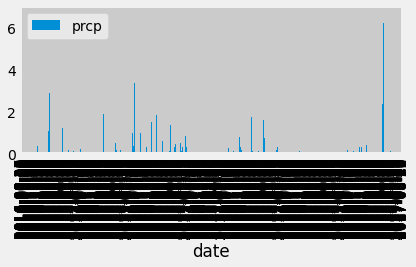

In [56]:

# Use Pandas Plotting with Matplotlib to plot the data
date_2016_08_23_df.plot.bar()
plt.tight_layout()
plt.show()



In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()